# Milestone 2 - Exploração dos dados
Neste notebook é realizada a análise exploratória aprofundada do dataset **IBM HR Analytics Employee Attrition & Performance**, com o objetivo de identificar padrões relevantes, relações estatísticas entre variáveis e possíveis problemas de qualidade dos dados, no âmbito das fases de Data Understanding e Data Preparation da metodologia CRISP-DM.

Após a contextualização do problema de negócio na Milestone 1, esta fase tem como propósito:

* Analisar a distribuição da variável-alvo e o equilíbrio de classes;
* Explorar relações bivariadas entre variáveis explicativas e o fenómeno de Attrition;
* Identificar correlações relevantes e possíveis multicolinearidades;
* Avaliar a qualidade dos dados (valores em falta, inconsistências e outliers);
* Realizar transformações e engenharia de atributos que acrescentem valor preditivo;
* Preparar um dataset limpo e estruturado para a fase de modelação (Milestone 3).

Esta etapa é fundamental para garantir que os dados utilizados na modelação refletem corretamente a realidade organizacional e que as decisões técnicas são sustentadas por evidência estatística e relevância para o negócio.
# Autores: et al. (realizado por todos)

## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Pandas versão:", pd.__version__)
print("NumPy versão:", np.__version__)
print("Matplotlib versão:", plt.matplotlib.__version__)
print("Seaborn versão:", sns.__version__)
# Autores: et al. (realizado por todos)

Pandas versão: 2.3.3
NumPy versão: 2.0.2
Matplotlib versão: 3.10.0
Seaborn versão: 0.13.2


## 2. Carregamento do Dataset

In [2]:
df = pd.read_csv(
    "/kaggle/input/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"
)

print("Dataset carregado com sucesso.")
# Autores: et al. (realizado por todos)

Dataset carregado com sucesso.


## 3. Identificação e Remoção de Variáveis Irrelevantes

In [3]:
# Identificar colunas com variância zero (valor único)
print("Colunas constantes:", df.columns[df.nunique() == 1].tolist())

# Remover variáveis irrelevantes
colunas_remover = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=colunas_remover)

print(f"\nColunas removidas com sucesso. O dataset passou a ter {df.shape[1]} variáveis.")
# Autor: Luís Figueira

Colunas constantes: ['EmployeeCount', 'Over18', 'StandardHours']

Colunas removidas com sucesso. O dataset passou a ter 31 variáveis.


# Análise Exploratória de Dados

## Estatística Descritiva e Univariada 

## 4.Criar histogramas e boxplots para variáveis numéricas. 

# Autor: Mateus Afonso

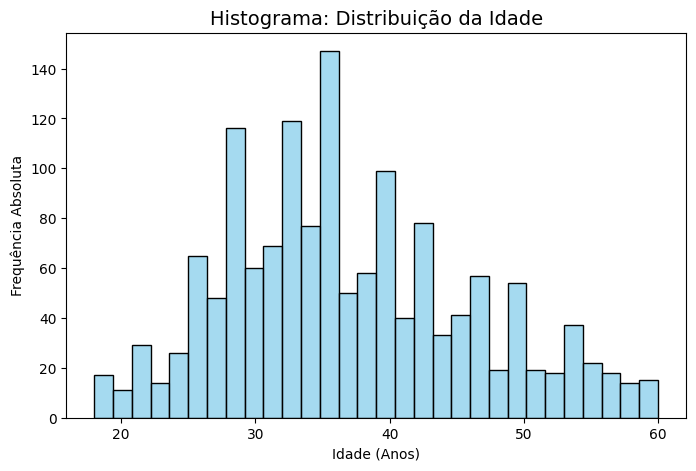

In [4]:
# Histograma da variável (Age) 
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], color='skyblue', bins=30)
plt.title('Histograma: Distribuição da Idade', fontsize=14)
plt.xlabel('Idade (Anos)')
plt.ylabel('Frequência Absoluta')
plt.show()

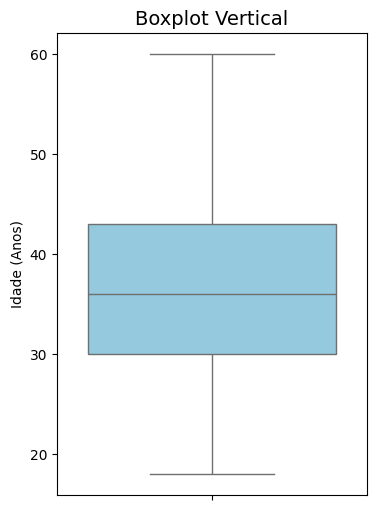

In [5]:
# Boxplot da variável (Age) 
plt.figure(figsize=(4, 6)) 
sns.boxplot(y=df['Age'], color='skyblue') 
plt.title('Boxplot Vertical', fontsize=14)
plt.ylabel('Idade (Anos)')
plt.show()

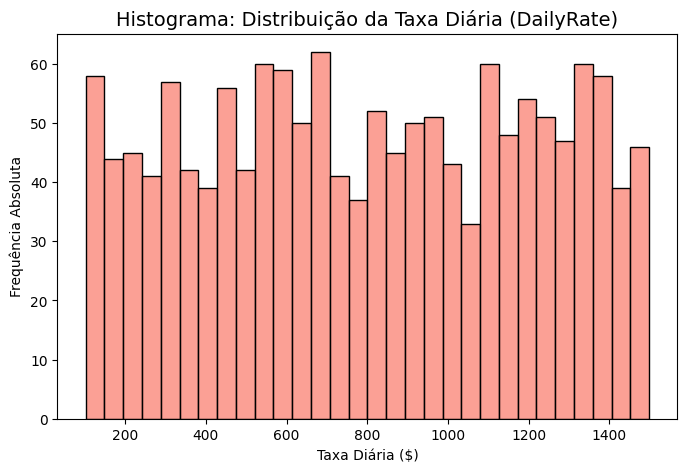

In [6]:
# Histograma da variável (DailyRate) 
plt.figure(figsize=(8, 5))
sns.histplot(df['DailyRate'], color='salmon', bins=30)
plt.title('Histograma: Distribuição da Taxa Diária (DailyRate)', fontsize=14)
plt.xlabel('Taxa Diária ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

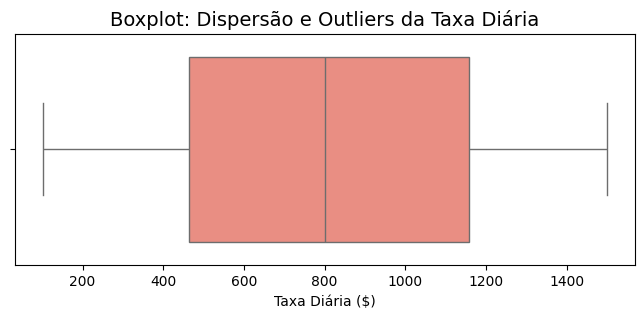

In [7]:
# Boxplot da variável (DailyRate) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['DailyRate'], color='salmon')
plt.title('Boxplot: Dispersão e Outliers da Taxa Diária', fontsize=14)
plt.xlabel('Taxa Diária ($)')
plt.show()

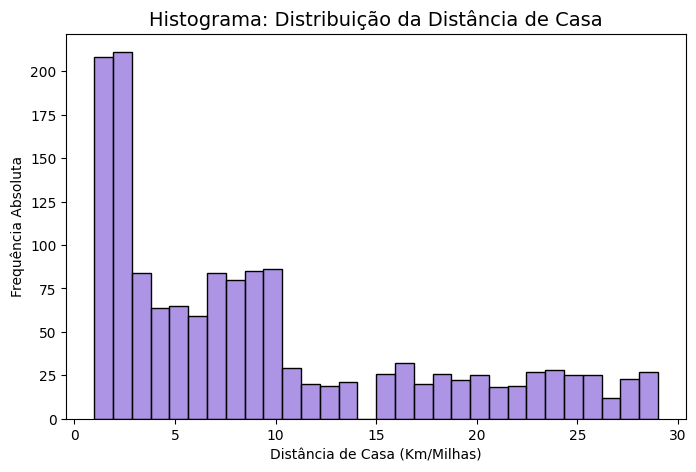

In [8]:
# Histograma da variável (DistanceFromHome) 
plt.figure(figsize=(8, 5))
sns.histplot(df['DistanceFromHome'], color='mediumpurple', bins=30)
plt.title('Histograma: Distribuição da Distância de Casa', fontsize=14)
plt.xlabel('Distância de Casa (Km/Milhas)')
plt.ylabel('Frequência Absoluta')
plt.show()

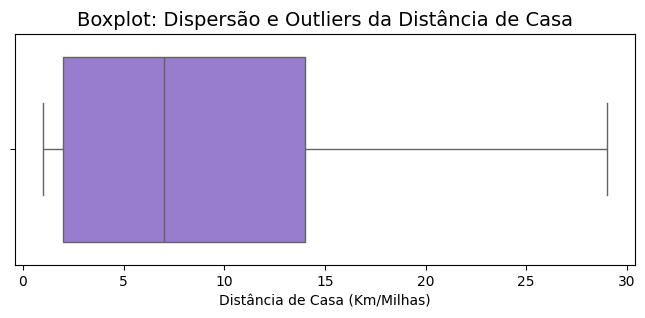

In [9]:
# Boxplot da variável (DistanceFromHome)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['DistanceFromHome'], color='mediumpurple')
plt.title('Boxplot: Dispersão e Outliers da Distância de Casa', fontsize=14)
plt.xlabel('Distância de Casa (Km/Milhas)')
plt.show()

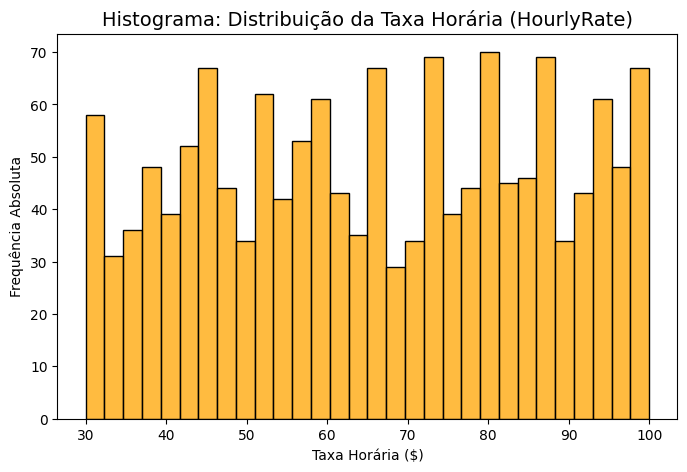

In [10]:
# Histograma da variável (HourlyRate) 
plt.figure(figsize=(8, 5))
sns.histplot(df['HourlyRate'], color='orange', bins=30)
plt.title('Histograma: Distribuição da Taxa Horária (HourlyRate)', fontsize=14)
plt.xlabel('Taxa Horária ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

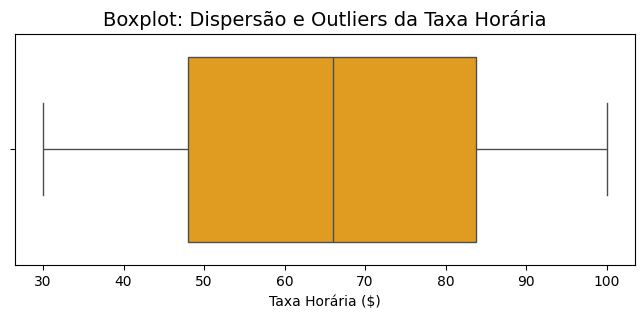

In [11]:
# Boxplot da variável (HourlyRate) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['HourlyRate'], color='orange')
plt.title('Boxplot: Dispersão e Outliers da Taxa Horária', fontsize=14)
plt.xlabel('Taxa Horária ($)')
plt.show()

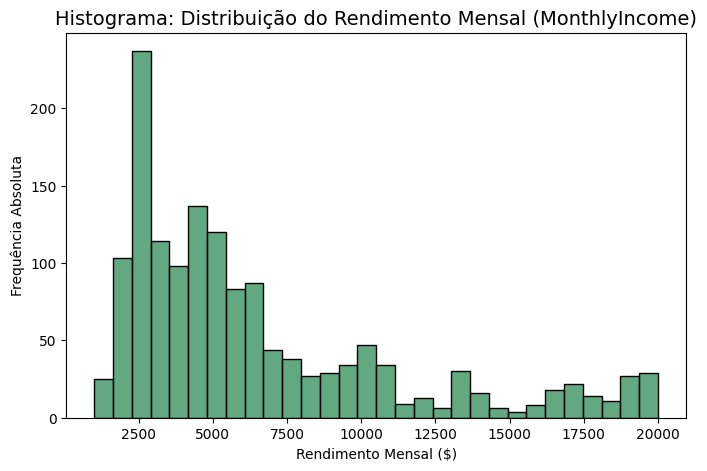

In [12]:
# Histograma dq variável (MonthlyIncome) 
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], color='seagreen', bins=30)
plt.title('Histograma: Distribuição do Rendimento Mensal (MonthlyIncome)', fontsize=14)
plt.xlabel('Rendimento Mensal ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

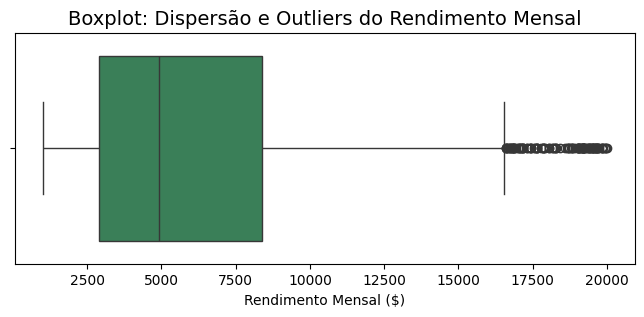

In [13]:
# Boxplot da variável (MonthlyIncome) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['MonthlyIncome'], color='seagreen')
plt.title('Boxplot: Dispersão e Outliers do Rendimento Mensal', fontsize=14)
plt.xlabel('Rendimento Mensal ($)')
plt.show()

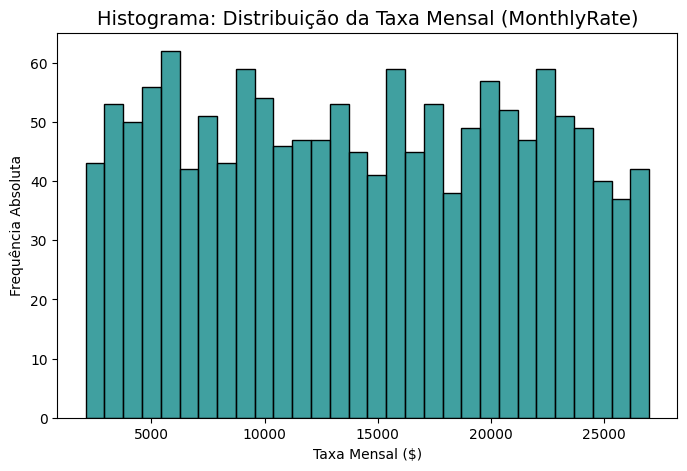

In [14]:
# Histograma da variável (MonthlyRate)
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyRate'], color='teal', bins=30)
plt.title('Histograma: Distribuição da Taxa Mensal (MonthlyRate)', fontsize=14)
plt.xlabel('Taxa Mensal ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

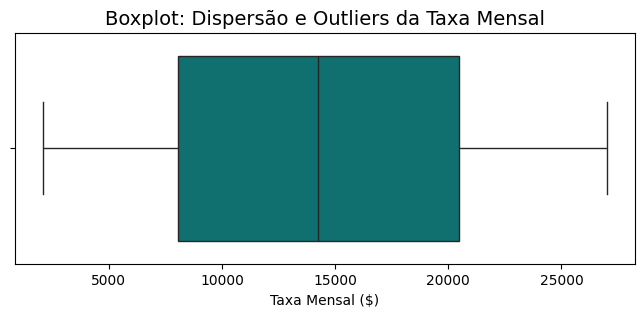

In [15]:
# Boxplot da variável (MonthlyRate)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['MonthlyRate'], color='teal')
plt.title('Boxplot: Dispersão e Outliers da Taxa Mensal', fontsize=14)
plt.xlabel('Taxa Mensal ($)')
plt.show()

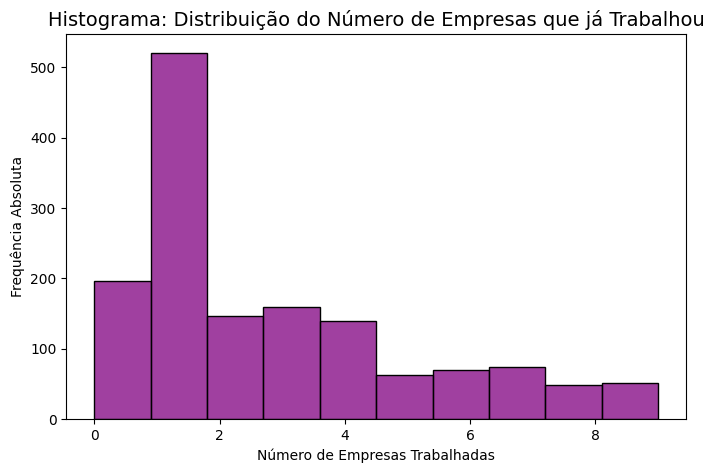

In [16]:
# Histograma da variável (NumCompaniesWorked)
plt.figure(figsize=(8, 5))
sns.histplot(df['NumCompaniesWorked'], color='purple', bins=10)
plt.title('Histograma: Distribuição do Número de Empresas que já Trabalhou', fontsize=14)
plt.xlabel('Número de Empresas Trabalhadas')
plt.ylabel('Frequência Absoluta')
plt.show()

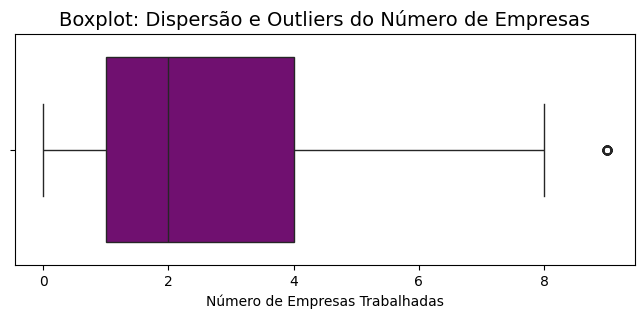

In [17]:
# Boxplot da variável (NumCompaniesWorked)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['NumCompaniesWorked'], color='purple')
plt.title('Boxplot: Dispersão e Outliers do Número de Empresas', fontsize=14)
plt.xlabel('Número de Empresas Trabalhadas')
plt.show()

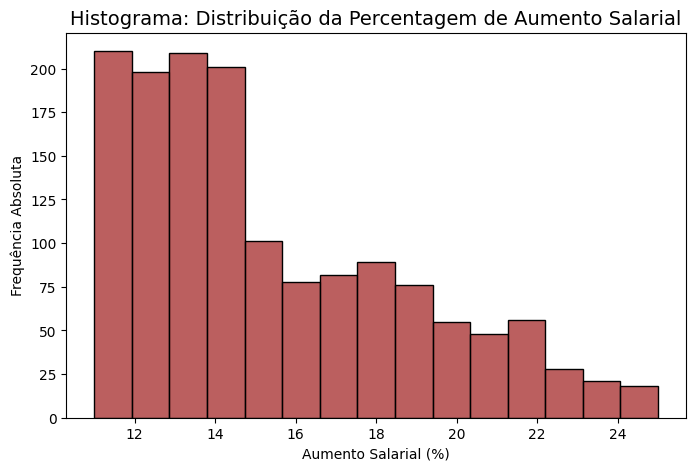

In [18]:
# Histograma da variável (PercentSalaryHike)
plt.figure(figsize=(8, 5))
sns.histplot(df['PercentSalaryHike'], color='brown', bins=15)
plt.title('Histograma: Distribuição da Percentagem de Aumento Salarial', fontsize=14)
plt.xlabel('Aumento Salarial (%)')
plt.ylabel('Frequência Absoluta')
plt.show()

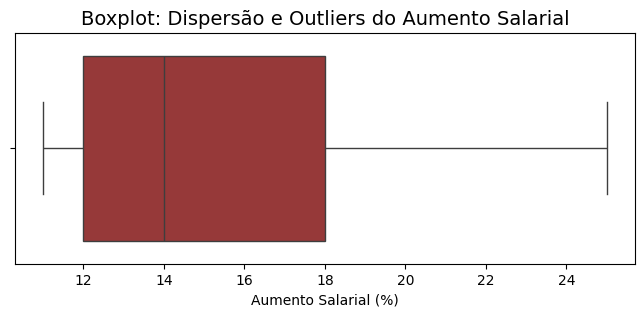

In [19]:
# Boxplot da variável (PercentSalaryHike)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['PercentSalaryHike'], color='brown')
plt.title('Boxplot: Dispersão e Outliers do Aumento Salarial', fontsize=14)
plt.xlabel('Aumento Salarial (%)')
plt.show()

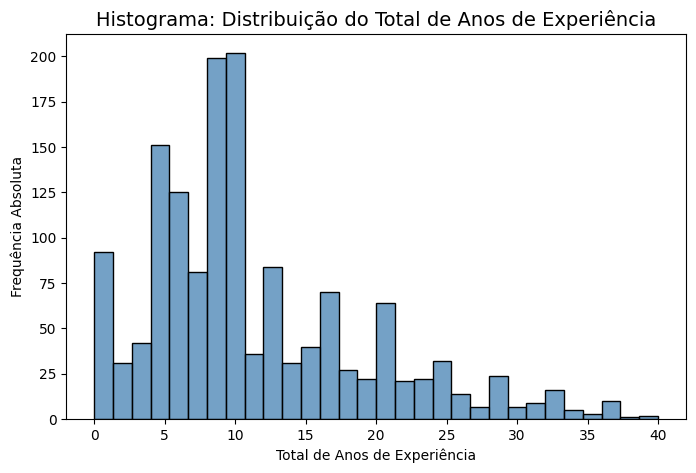

In [20]:
# Histograma da variável (TotalWorkingYears)
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalWorkingYears'], color='steelblue', bins=30)
plt.title('Histograma: Distribuição do Total de Anos de Experiência', fontsize=14)
plt.xlabel('Total de Anos de Experiência')
plt.ylabel('Frequência Absoluta')
plt.show()

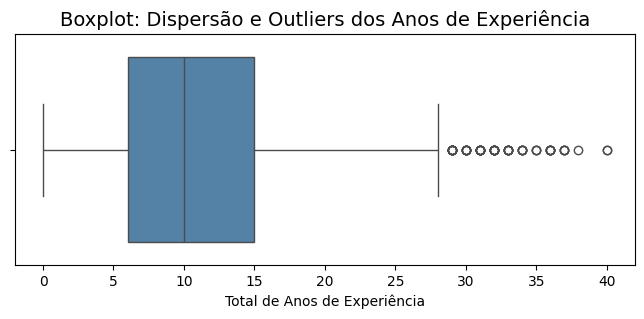

In [21]:
# Boxplot da variável (TotalWorkingYears)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['TotalWorkingYears'], color='steelblue')
plt.title('Boxplot: Dispersão e Outliers dos Anos de Experiência', fontsize=14)
plt.xlabel('Total de Anos de Experiência')
plt.show()

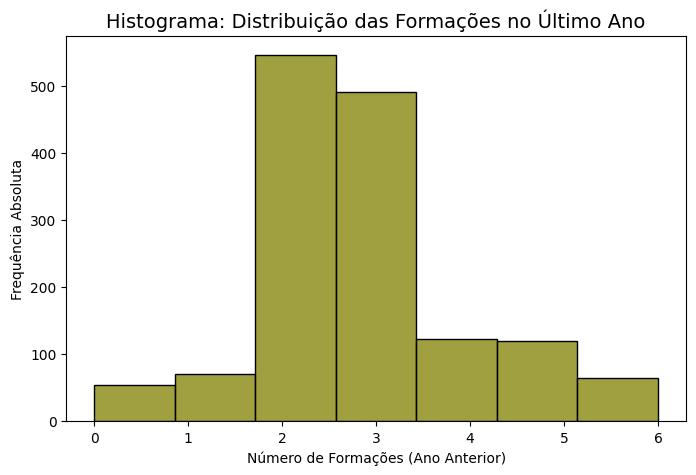

In [22]:
# Histograma da variável (TrainingTimesLastYear)
plt.figure(figsize=(8, 5))
sns.histplot(df['TrainingTimesLastYear'], color='olive', bins=7)
plt.title('Histograma: Distribuição das Formações no Último Ano', fontsize=14)
plt.xlabel('Número de Formações (Ano Anterior)')
plt.ylabel('Frequência Absoluta')
plt.show()

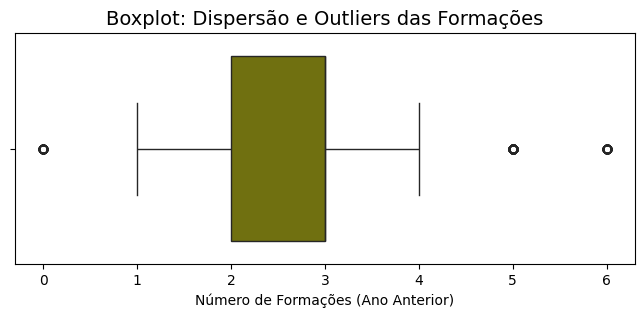

In [23]:
# Boxplot da variável (TrainingTimesLastYear)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['TrainingTimesLastYear'], color='olive')
plt.title('Boxplot: Dispersão e Outliers das Formações', fontsize=14)
plt.xlabel('Número de Formações (Ano Anterior)')
plt.show()

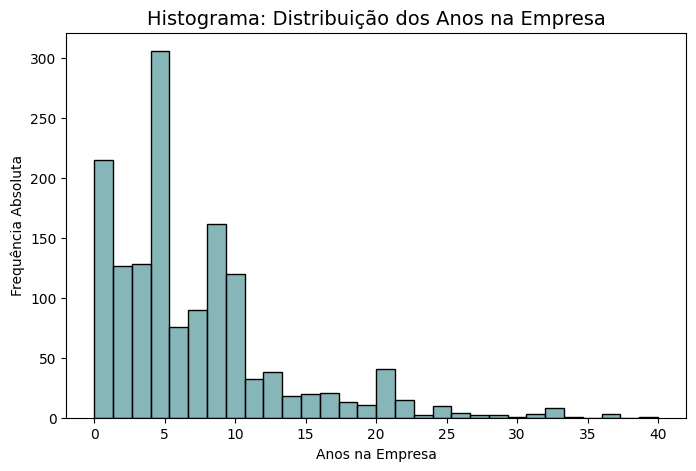

In [24]:
# Histograma da variável (YearsAtCompany)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsAtCompany'], color='cadetblue', bins=30)
plt.title('Histograma: Distribuição dos Anos na Empresa', fontsize=14)
plt.xlabel('Anos na Empresa')
plt.ylabel('Frequência Absoluta')
plt.show()

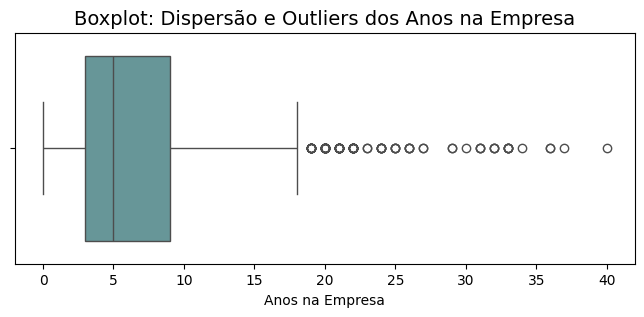

In [25]:
# Boxplot da variável (YearsAtCompany)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsAtCompany'], color='cadetblue')
plt.title('Boxplot: Dispersão e Outliers dos Anos na Empresa', fontsize=14)
plt.xlabel('Anos na Empresa')
plt.show()

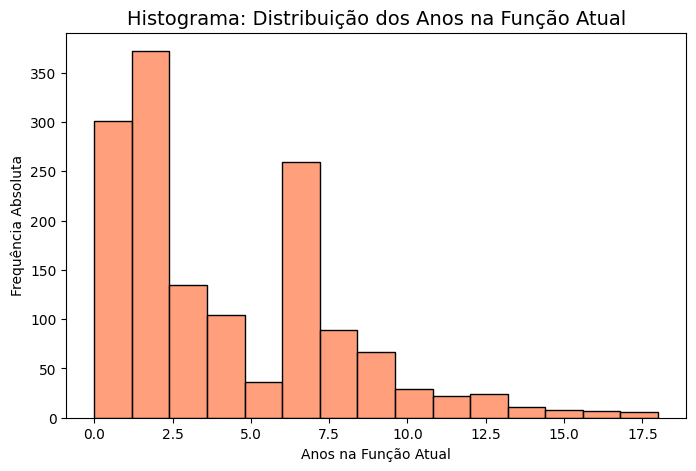

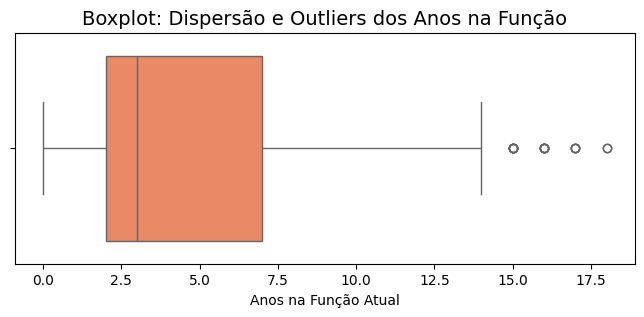

In [26]:
# Histograma da variável (YearsInCurrentRole)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsInCurrentRole'], color='coral', bins=15)
plt.title('Histograma: Distribuição dos Anos na Função Atual', fontsize=14)
plt.xlabel('Anos na Função Atual')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (YearsInCurrentRole)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsInCurrentRole'], color='coral')
plt.title('Boxplot: Dispersão e Outliers dos Anos na Função', fontsize=14)
plt.xlabel('Anos na Função Atual')
plt.show()

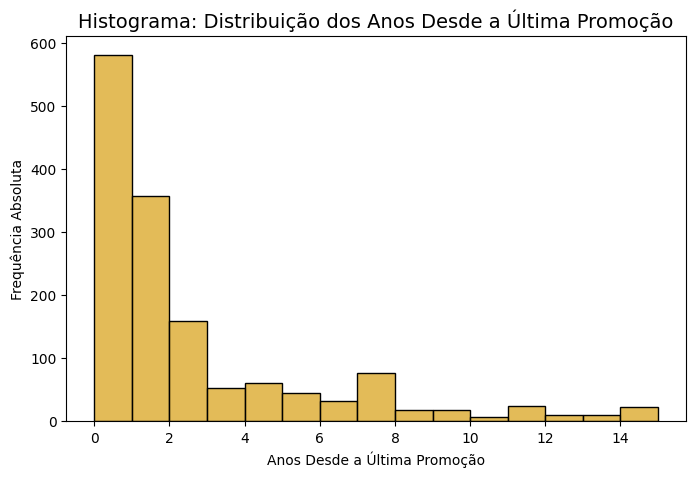

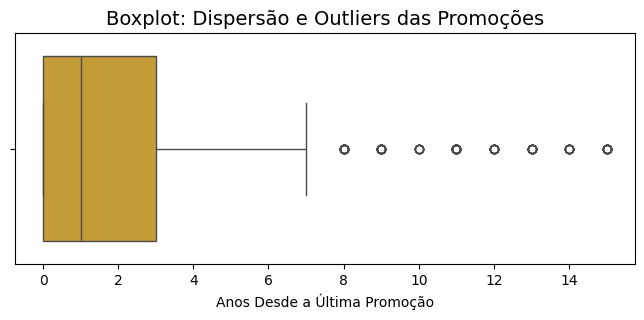

In [27]:
# Histograma da variável (YearsSinceLastPromotion)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsSinceLastPromotion'], color='goldenrod', bins=15)
plt.title('Histograma: Distribuição dos Anos Desde a Última Promoção', fontsize=14)
plt.xlabel('Anos Desde a Última Promoção')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (YearsSinceLastPromotion)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsSinceLastPromotion'], color='goldenrod')
plt.title('Boxplot: Dispersão e Outliers das Promoções', fontsize=14)
plt.xlabel('Anos Desde a Última Promoção')
plt.show()

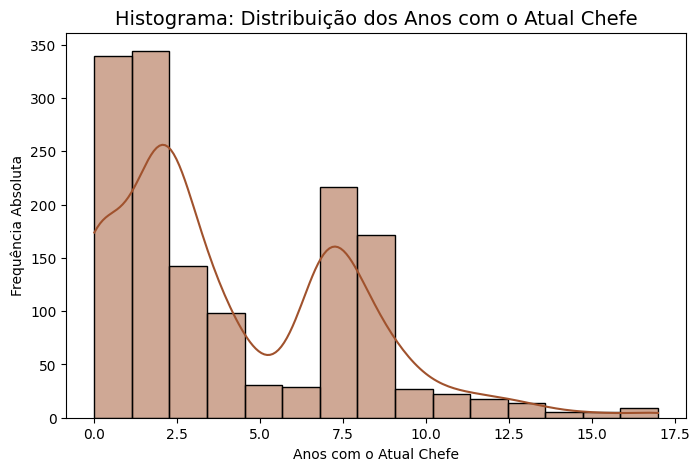

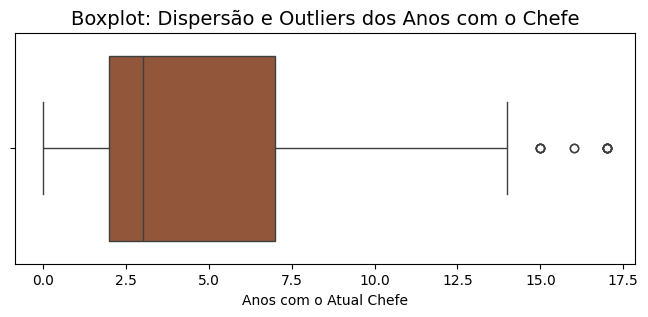

In [28]:
# Histograma da variável (YearsWithCurrManager)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsWithCurrManager'], kde=True, color='sienna', bins=15)
plt.title('Histograma: Distribuição dos Anos com o Atual Chefe', fontsize=14)
plt.xlabel('Anos com o Atual Chefe')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (YearsWithCurrManager)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsWithCurrManager'], color='sienna')
plt.title('Boxplot: Dispersão e Outliers dos Anos com o Chefe', fontsize=14)
plt.xlabel('Anos com o Atual Chefe')
plt.show()